In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, kruskal

%matplotlib inline
sns.set(style="whitegrid")


In [4]:
benin = pd.read_csv('../data/benin_clean.csv')
sierra_leone = pd.read_csv('../data/sierraleone_clean.csv')
togo = pd.read_csv('../data/togo_clean.csv')

benin['Country'] = 'Benin'
sierra_leone['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'

df = pd.concat([benin, sierra_leone, togo], ignore_index=True)


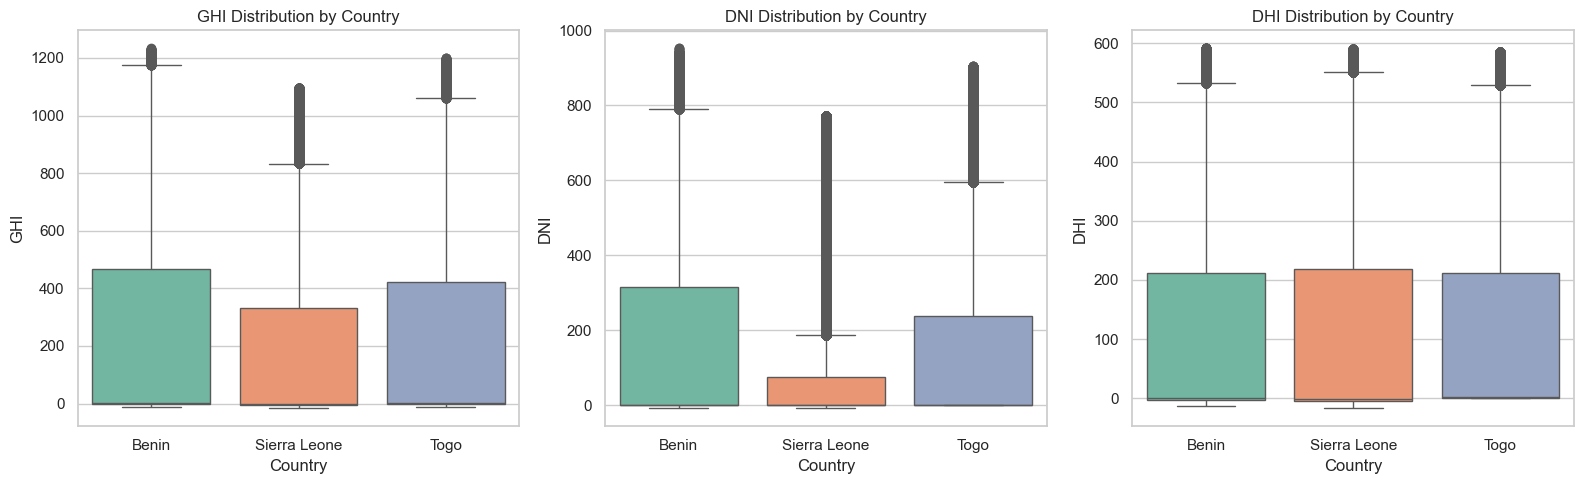

In [11]:
plt.figure(figsize=(16, 5))
for i, var in enumerate(['GHI', 'DNI', 'DHI']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=df, x='Country', y=var, hue='Country', palette="Set2", legend=False)
    plt.title(f'{var} Distribution by Country')
plt.tight_layout()
plt.show()


In [6]:
metrics = ['GHI', 'DNI', 'DHI']
summary = df.groupby('Country')[metrics].agg(['mean', 'median', 'std']).round(2)
summary


GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         236.23    0.7  328.29  166.90   -0.1  262.08  111.66    0.5   
Sierra Leone  185.00   -0.4  279.02  104.13   -0.1  200.95  108.10   -0.6   
Togo          223.86    0.5  317.31  147.98    0.0  247.68  112.78    1.5   

                      
                 std  
Country               
Benin         153.10  
Sierra Leone  153.69  
Togo          151.57

In [7]:
ghi_groups = [benin['GHI'].dropna(), sierra_leone['GHI'].dropna(), togo['GHI'].dropna()]
anova_result = f_oneway(*ghi_groups)
print(f"ANOVA result: F = {anova_result.statistic:.2f}, p = {anova_result.pvalue:.4f}")

kruskal_result = kruskal(*ghi_groups)
print(f"Kruskal-Wallis result: H = {kruskal_result.statistic:.2f}, p = {kruskal_result.pvalue:.4f}")


ANOVA result: F = 3833.18, p = 0.0000
Kruskal-Wallis result: H = 6548.53, p = 0.0000


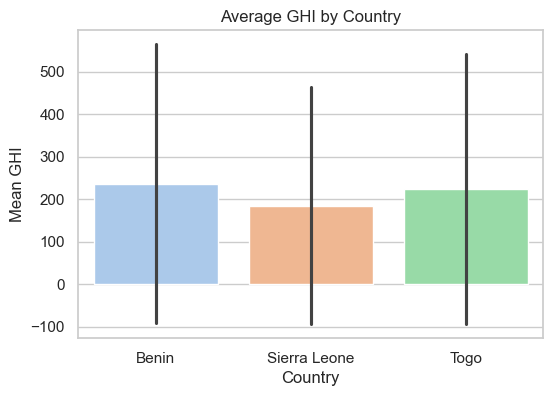

In [9]:
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='Country', y='GHI', estimator='mean', errorbar='sd', hue='Country', palette='pastel', legend=False)
plt.title('Average GHI by Country')
plt.ylabel('Mean GHI')
plt.show()


### 🔍 Key Observations

- Benin has the highest GHI median.
- Sierra Leone exhibits the lowest solar radiation.
- The differences are statistically significant (p < 0.05).
